<a href="https://colab.research.google.com/github/Samuel5106/-Prediction-of-Credit-Card-Default-/blob/main/Anomalies_detection_for_FFT_Normal_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/fft_data_normal (5).csv')
df.head()

,rms_radial,std_radial,fft_radial_1,fft_radial_2,fft_radial_3,fft_radial_4,fft_radial_5,freq_radial_1,freq_radial_2,freq_radial_3,freq_radial_4,freq_radial_5
0,0.307307,0.307306,99.338859,62.879069,59.630406,58.193437,50.377067,118.75,400.0,243.75,25.0,62.5
1,0.308942,0.308916,91.635504,53.388580,52.573097,51.987003,51.662319,118.75,12.5,37.50,275.0,25.0
2,0.302356,0.302346,98.610970,50.787886,49.574871,47.647204,47.504808,118.75,37.5,306.25,362.5,237.5
3,0.308293,0.308292,97.687546,61.742859,58.618425,51.486143,50.967359,118.75,25.0,243.75,437.5,162.5
4,0.309555,0.309539,100.914100,60.573190,55.749404,53.645288,53.332302,118.75,362.5,12.50,25.0,275.0


In [3]:
df.tail()

,rms_radial,std_radial,fft_radial_1,fft_radial_2,fft_radial_3,fft_radial_4,fft_radial_5,freq_radial_1,freq_radial_2,freq_radial_3,freq_radial_4,freq_radial_5
1514,0.491818,0.491813,476.035485,285.817211,280.163014,205.790608,182.511356,62.500000,406.250000,243.750000,368.750000,187.500000
1515,0.505040,0.505038,485.435128,274.004773,248.791180,184.756427,178.915482,62.500000,406.250000,243.750000,368.750000,306.250000
1516,0.524760,0.524707,506.605304,368.474546,353.162210,208.557993,182.356402,62.500000,406.250000,243.750000,368.750000,637.500000
1517,0.493007,0.493007,495.696678,292.024642,276.595062,249.829480,170.070287,62.500000,406.250000,250.000000,368.750000,187.500000
1518,0.497530,0.497530,255.083560,180.358493,134.996281,125.660032,119.373660,60.377358,398.490566,458.867925,241.509434,362.264151


In [4]:
df.shape

(1519, 12)

In [5]:
df.columns

Index(['rms_radial', 'std_radial', 'fft_radial_1', 'fft_radial_2',
       'fft_radial_3', 'fft_radial_4', 'fft_radial_5', 'freq_radial_1',
       'freq_radial_2', 'freq_radial_3', 'freq_radial_4', 'freq_radial_5'],
      dtype='object')

In [6]:
df.columns

Index(['rms_radial', 'std_radial', 'fft_radial_1', 'fft_radial_2',
       'fft_radial_3', 'fft_radial_4', 'fft_radial_5', 'freq_radial_1',
       'freq_radial_2', 'freq_radial_3', 'freq_radial_4', 'freq_radial_5'],
      dtype='object')

In [7]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense
# import matplotlib.pyplot as plt

In [8]:
# import numpy as np
# import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/fft_data_normal (5).csv')

# Extract the input features
X = data[['freq_radial_1', 'freq_radial_2', 'freq_radial_3', 'freq_radial_4', 'freq_radial_5']].values

# Normalize the input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define the autoencoder model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=7, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=7, activation='relu'),
    tf.keras.layers.Dense(units=5)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Use the trained model to reconstruct the input data
X_pred = model.predict(X)

# Compute the reconstruction error
mse = np.mean(np.power(X - X_pred, 2), axis=1)

# Set the threshold for anomaly detection
threshold = np.max(mse) * 0.5


# Find the anomalies
anomalies = X[mse > threshold]

Epoch 1/100
38/38 [==============================] - 6s 8ms/step - loss: 0.0822 - val_loss: 0.0669
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0520 - val_loss: 0.0442
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0370 - val_loss: 0.0334
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.0306
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0301 - val_loss: 0.0297
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0293 - val_loss: 0.0290
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0286 - val_loss: 0.0283
Epoch 8/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0280 - val_loss: 0.0277
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0275 - val_loss: 0.0273
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0272 - val_loss: 0.0269
Epoch 11/

In [9]:
print(threshold)

0.09317438946070153


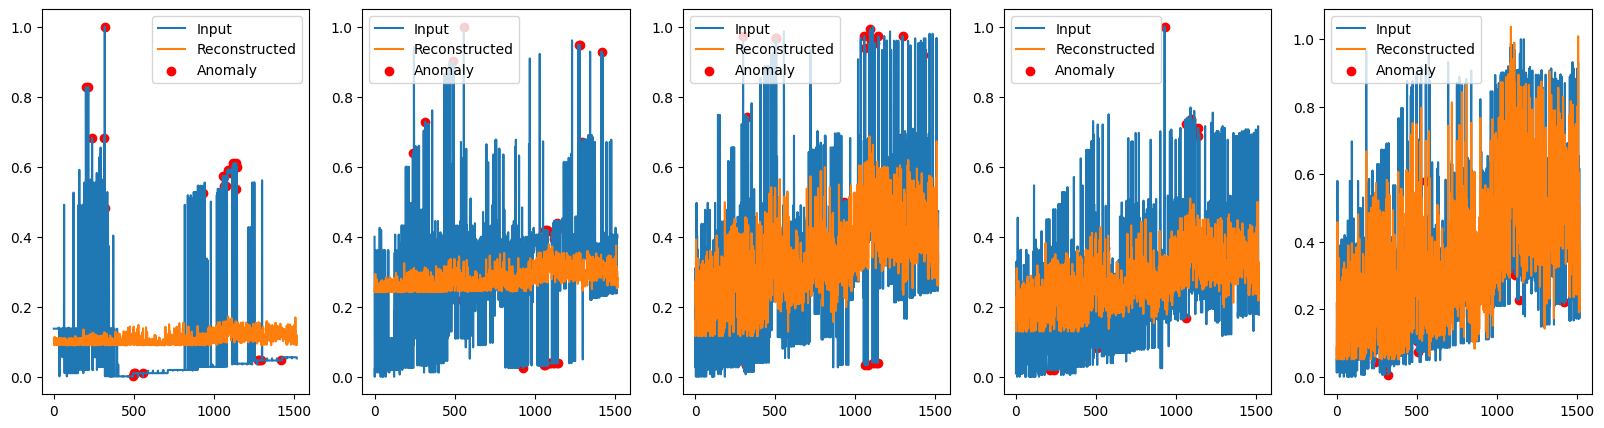

[[0.82748578 0.38709677 0.11298179 0.21774459 0.08024691]
 [0.82748578 0.10967742 0.06664502 0.01935507 0.08024691]
 [0.68221065 0.63870968 0.11298179 0.01935507 0.04320988]
 [0.1374289  0.45806452 0.97352184 0.03871015 0.0308642 ]
 [0.68221065 0.72903226 0.03354732 0.23226089 0.38888889]
 [1.         0.10967742 0.03354732 0.19838951 0.38271605]
 [0.48245734 0.10967742 0.74183798 0.02419384 0.00617284]
 [0.00123347 0.90322581 0.45057827 0.15484059 0.11111111]
 [0.01031316 0.4        0.96690231 0.21290582 0.10493827]
 [0.01031316 0.21935484 0.96690231 0.08225907 0.07407407]
 [0.01031316 1.         0.25861165 0.36774641 0.58024691]
 [0.52627972 0.02449178 0.4987885  1.         0.3096669 ]
 [0.5732543  0.03225806 0.97352184 0.42097287 0.38271605]
 [0.5732543  0.03225806 0.94042415 0.1693569  0.38271605]
 [0.54601521 0.41935484 0.03354732 0.72097652 0.62962963]
 [0.54601521 0.41935484 0.03354732 0.72097652 0.62962963]
 [0.59141369 0.03870968 0.41086104 0.72581529 0.32098765]
 [0.59141369 0

In [10]:
# Visualize the anomalies
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=5, figsize=(20,5))
for i in range(5):
    ax[i].plot(X[:,i], label='Input')
    ax[i].plot(X_pred[:,i], label='Reconstructed')
    ax[i].scatter(np.where(mse > threshold), anomalies[:,i], color='red', label='Anomaly')
    ax[i].legend()
plt.show()

# Print the anomalies
print(anomalies)

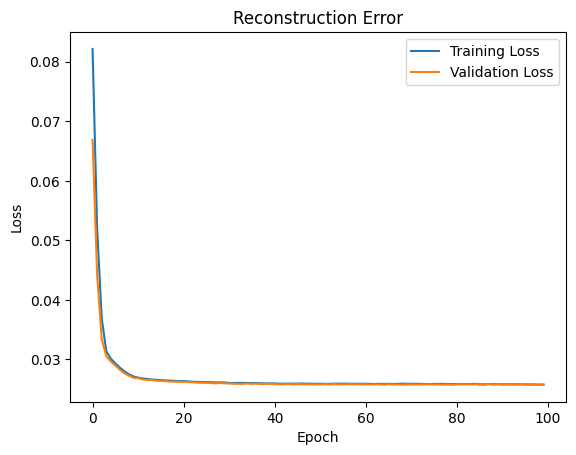

In [11]:
# Plot the reconstruction error
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Reconstruction Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
38/38 [==============================] - 2s 8ms/step - loss: 0.9567 - val_loss: 0.8246
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 0.6572 - val_loss: 0.4925
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 0.3340 - val_loss: 0.2260
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 0.1465 - val_loss: 0.0871
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0612 - val_loss: 0.0450
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0358 - val_loss: 0.0305
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.0232
Epoch 8/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.0196
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.0164
Epoch 10/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.0147
Epoch 11/50
38/38 [

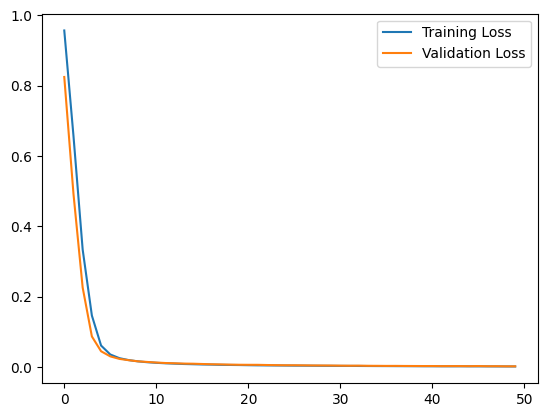

10/10 [==============================] - 0s 2ms/step


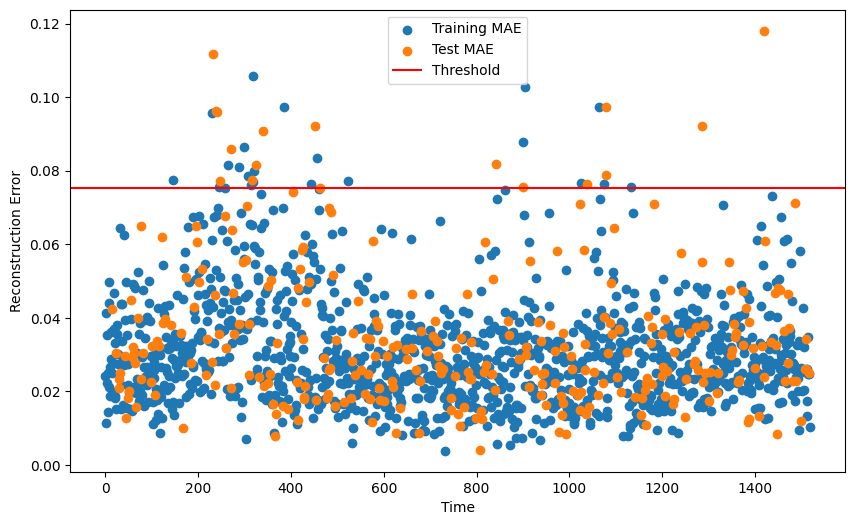

      rms_radial  std_radial  fft_radial_1  fft_radial_2  fft_radial_3  \
1286    0.523809    0.523807    424.688676    389.964721    344.430664   
239     0.310247    0.310240     75.287750     63.720215     60.212981   
1420    0.455313    0.455254    465.596921    176.872881    168.204188   
339     0.315427    0.315419     90.076946     63.414214     60.311888   
316     0.310588    0.310534     53.805729     53.208975     52.766504   
451     0.348601    0.348592    283.607285     71.891110     71.015516   
1079    0.577833    0.577746    572.363555    421.698752    266.668573   
247     0.319391    0.319340     42.178653     40.443614     37.398131   
1037    0.554786    0.554758    496.596275    432.296696    260.932535   
1078    0.592774    0.592629    534.251537    443.293003    421.995772   
240     0.316996    0.316950     95.536247     72.264137     64.592444   
462     0.347816    0.347650    271.020312     83.669438     76.648931   
324     0.318975    0.318964     64.52

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
#df = pd.read_csv('time_series_data.csv')

# Select the columns to use for anomaly detection
cols = ['freq_radial_1', 'freq_radial_2', 'freq_radial_3', 'freq_radial_4', 'freq_radial_5']

# Standardize the data
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Define the autoencoder architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(len(cols),)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(cols)))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='min')
history = model.fit(train[cols], train[cols],
                    epochs=50,
                    batch_size=32,
                    validation_data=(test[cols], test[cols]),
                    callbacks=[early_stop])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Use the trained model to reconstruct the input data
train_pred = model.predict(train[cols])
train_mae = np.mean(np.abs(train_pred - train[cols]), axis=1)

# Calculate the reconstruction error on the test set
test_pred = model.predict(test[cols])
test_mae = np.mean(np.abs(test_pred - test[cols]), axis=1)

# Define a threshold for anomaly detection
threshold = np.mean(train_mae) + 3 * np.std(train_mae)

# Visualize the reconstruction error and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(train.index, train_mae, label='Training MAE')
plt.scatter(test.index, test_mae, label='Test MAE')
plt.axhline(threshold, color='red', label='Threshold')
plt.xlabel('Time')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()

# Detect the anomalies
anomalies = test[test_mae > threshold]

# Print the anomalies
print(anomalies)

In [13]:
data.columns

Index(['rms_radial', 'std_radial', 'fft_radial_1', 'fft_radial_2',
       'fft_radial_3', 'fft_radial_4', 'fft_radial_5', 'freq_radial_1',
       'freq_radial_2', 'freq_radial_3', 'freq_radial_4', 'freq_radial_5'],
      dtype='object')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

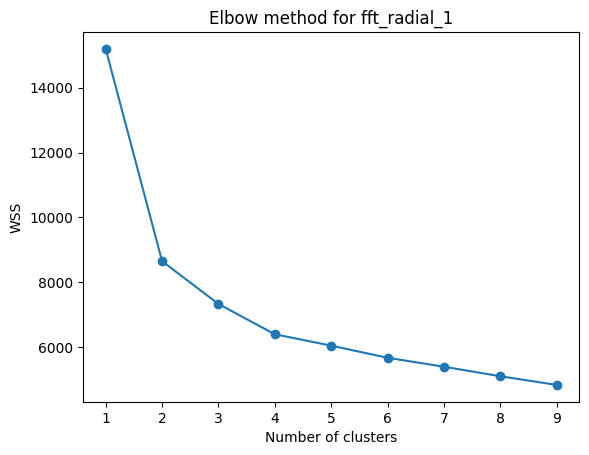

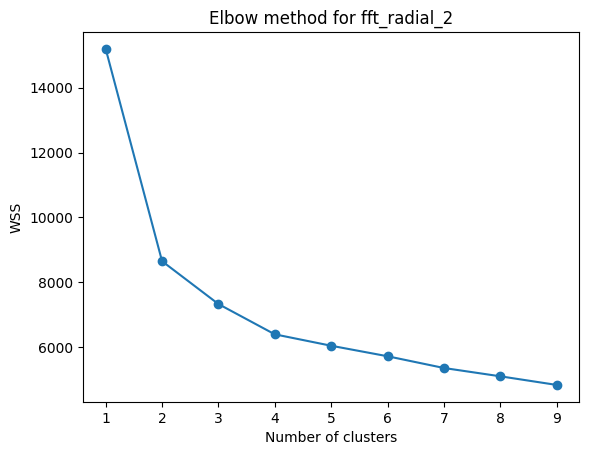

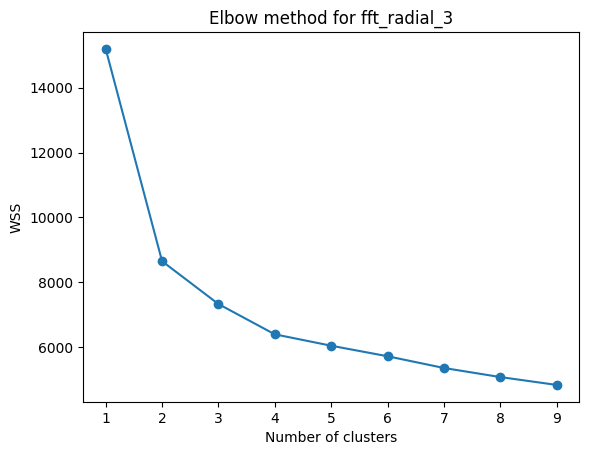

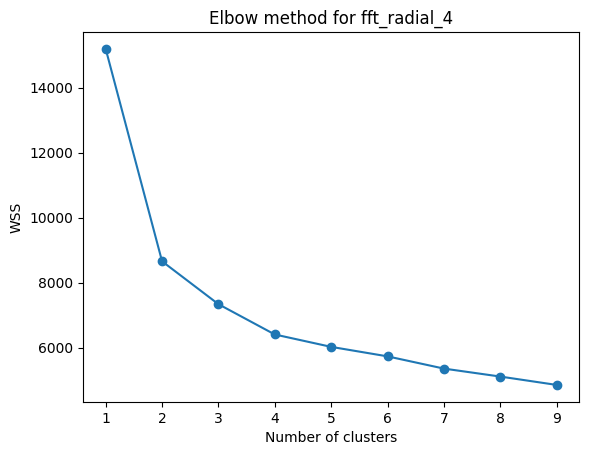

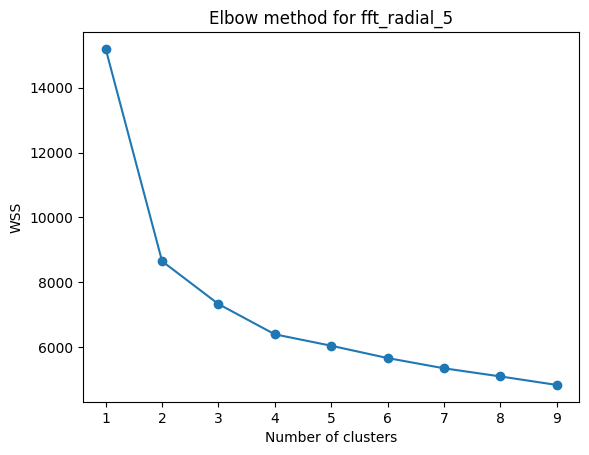

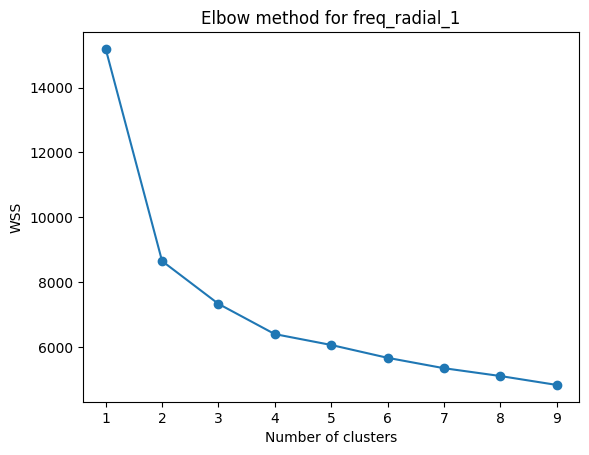

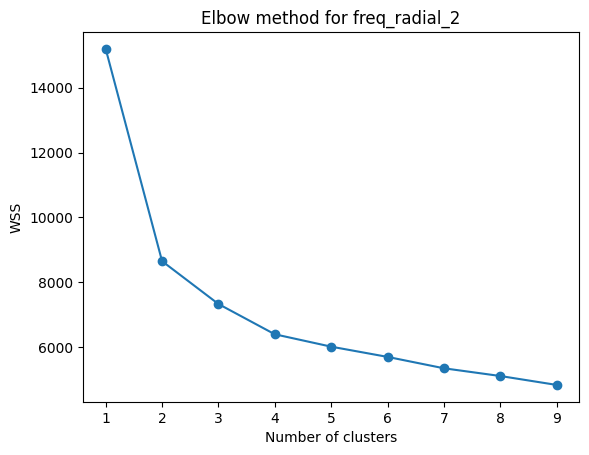

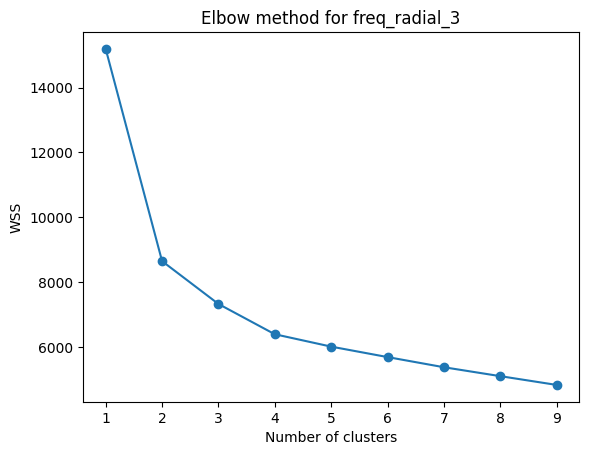

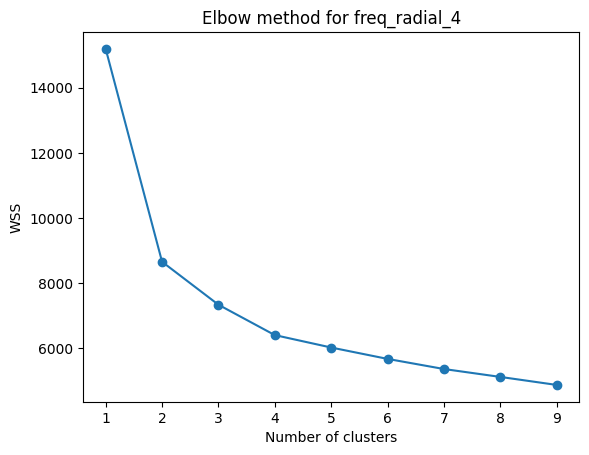

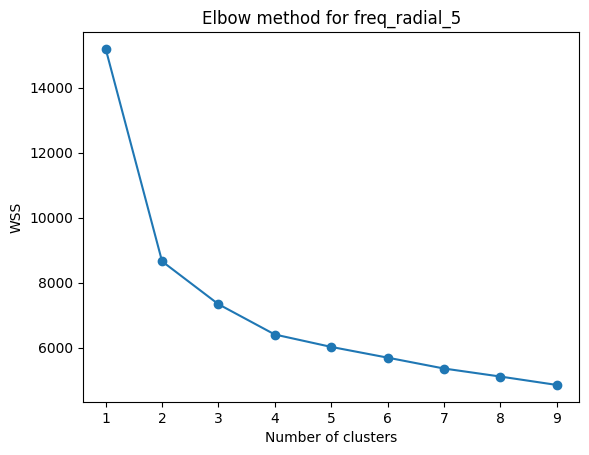

The optimal number of clusters for fft_radial_1 is 9
The optimal number of clusters for fft_radial_2 is 9
The optimal number of clusters for fft_radial_3 is 9
The optimal number of clusters for fft_radial_4 is 9
The optimal number of clusters for fft_radial_5 is 9
The optimal number of clusters for freq_radial_1 is 9
The optimal number of clusters for freq_radial_2 is 9
The optimal number of clusters for freq_radial_3 is 9
The optimal number of clusters for freq_radial_4 is 9
The optimal number of clusters for freq_radial_5 is 9


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# # Load the data
# df = pd.read_csv('data.csv')

# Choose the columns to cluster
cols_to_cluster = ['fft_radial_1', 'fft_radial_2',
       'fft_radial_3', 'fft_radial_4', 'fft_radial_5', 'freq_radial_1',
       'freq_radial_2', 'freq_radial_3', 'freq_radial_4', 'freq_radial_5']

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(df[cols_to_cluster])

# Choose the range of clusters
k_range = range(1, 10)

# Run k-means clustering for each column and each value of k
optimal_clusters = {}
for col in cols_to_cluster:
    optimal_clusters[col] = {}
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        optimal_clusters[col][k] = {'wss': kmeans.inertia_}

# Evaluate the clustering performance using the elbow method
for col in cols_to_cluster:
    wss_values = [optimal_clusters[col][k]['wss'] for k in k_range]
    plt.plot(k_range, wss_values, '-o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS')
    plt.title(f'Elbow method for {col}')
    plt.show()

# Store the optimal number of clusters for each column
for col in cols_to_cluster:
    wss_values = [optimal_clusters[col][k]['wss'] for k in k_range]
    optimal_k = k_range[wss_values.index(min(wss_values))]
    optimal_clusters[col]['optimal_k'] = optimal_k
    print(f'The optimal number of clusters for {col} is {optimal_k}')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

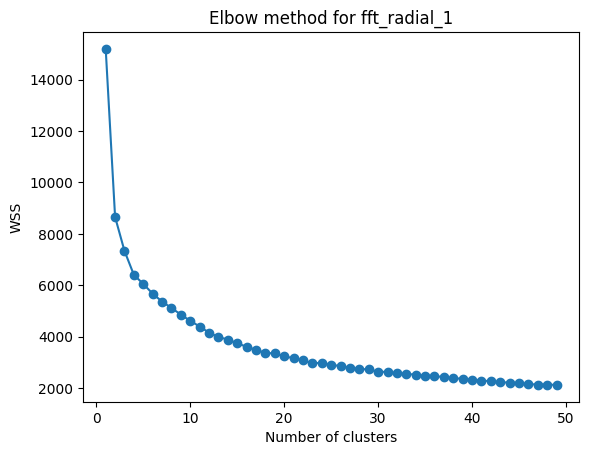

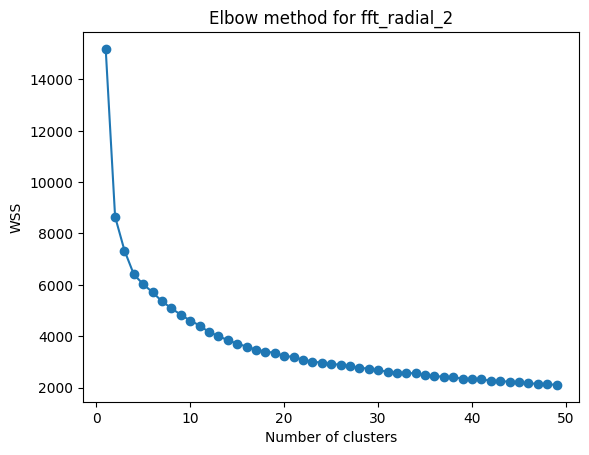

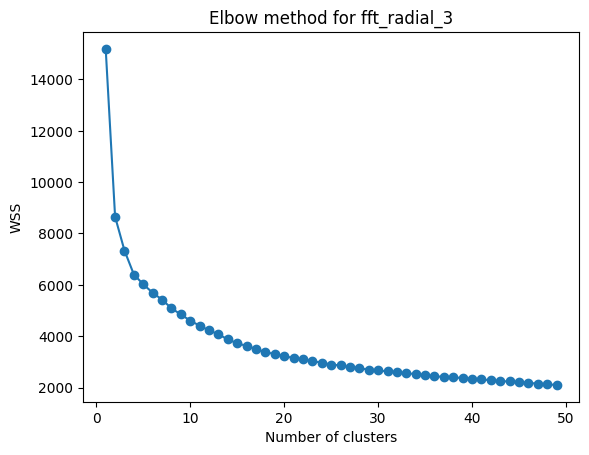

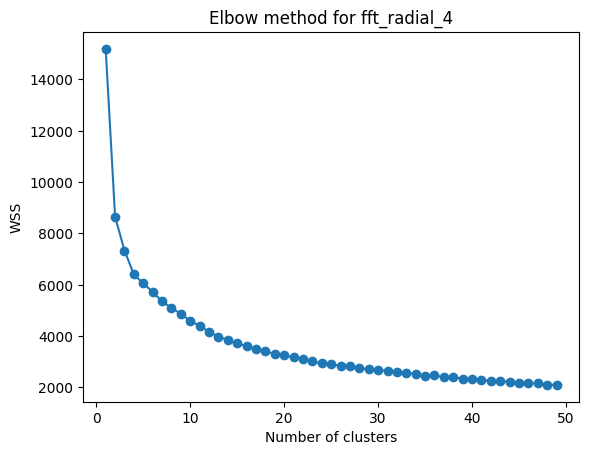

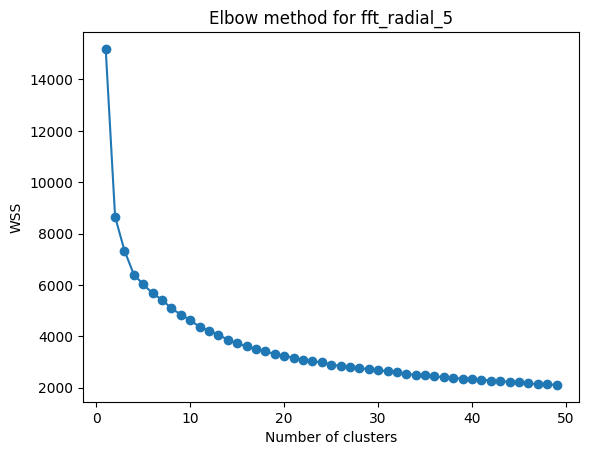

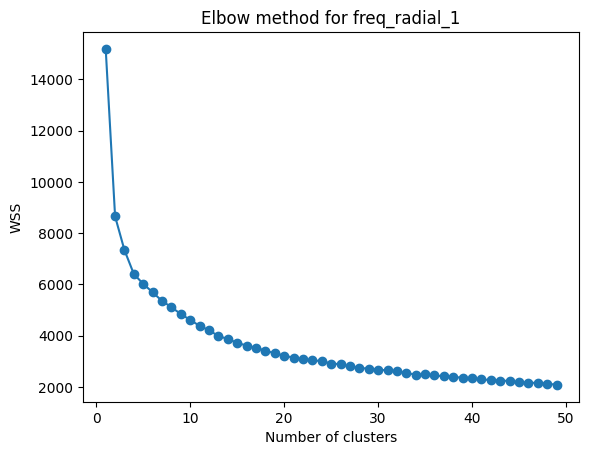

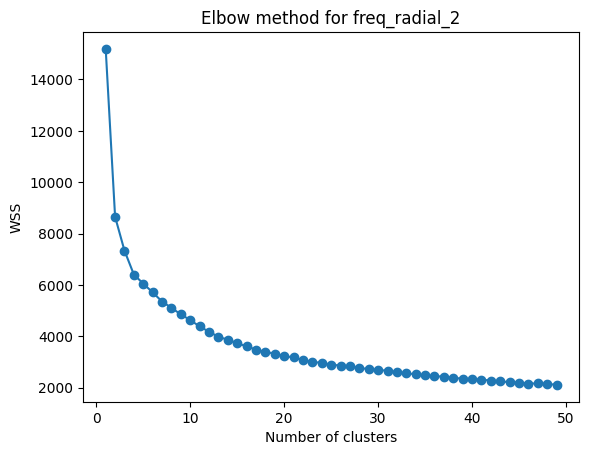

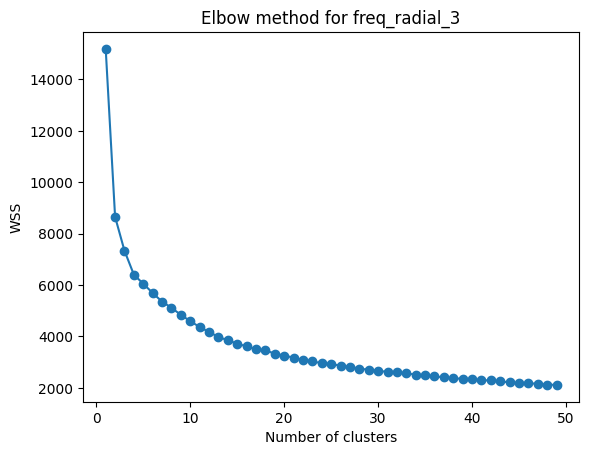

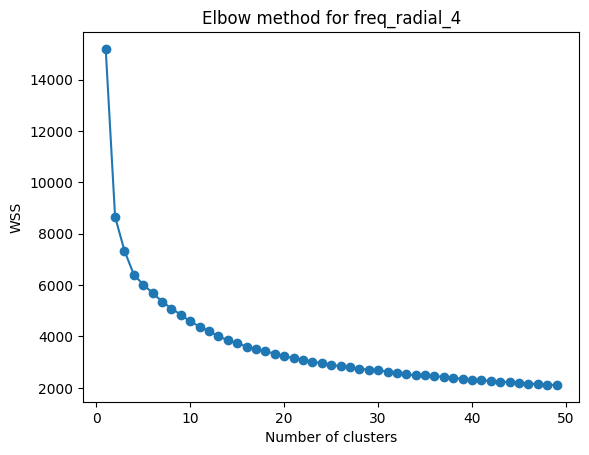

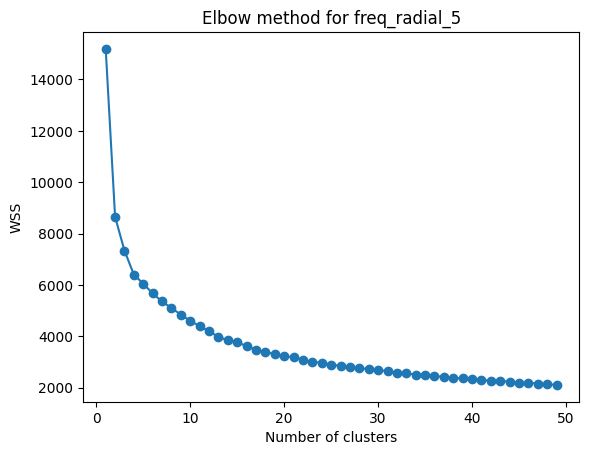

The optimal number of clusters for fft_radial_1 is 49
The optimal number of clusters for fft_radial_2 is 49
The optimal number of clusters for fft_radial_3 is 49
The optimal number of clusters for fft_radial_4 is 49
The optimal number of clusters for fft_radial_5 is 49
The optimal number of clusters for freq_radial_1 is 49
The optimal number of clusters for freq_radial_2 is 49
The optimal number of clusters for freq_radial_3 is 49
The optimal number of clusters for freq_radial_4 is 49
The optimal number of clusters for freq_radial_5 is 49


In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Choose the columns to cluster
cols_to_cluster = ['fft_radial_1', 'fft_radial_2',
       'fft_radial_3', 'fft_radial_4', 'fft_radial_5', 'freq_radial_1',
       'freq_radial_2', 'freq_radial_3', 'freq_radial_4', 'freq_radial_5']

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(df[cols_to_cluster])

# Choose the range of clusters
k_range = range(1, 50)

# Run k-means clustering for each column and each value of k
optimal_clusters = {}
for col in cols_to_cluster:
    optimal_clusters[col] = {}
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        optimal_clusters[col][k] = {'wss': kmeans.inertia_}

# Evaluate the clustering performance using the elbow method
for col in cols_to_cluster:
    wss_values = [optimal_clusters[col][k]['wss'] for k in k_range]
    plt.plot(k_range, wss_values, '-o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS')
    plt.title(f'Elbow method for {col}')
    plt.show()

# Store the optimal number of clusters for each column
for col in cols_to_cluster:
    wss_values = [optimal_clusters[col][k]['wss'] for k in k_range]
    optimal_k = k_range[wss_values.index(min(wss_values))]
    optimal_clusters[col]['optimal_k'] = optimal_k
    print(f'The optimal number of clusters for {col} is {optimal_k}')
